# Functional enrichment analysis with g:Profiler

In [1]:
library(tidyverse)
library(gprofiler2)

-- Attaching packages ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.2     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



## Load DEG results

In [2]:
deg <- data.table::fread('../../metrics_summary/_m/female_specific_DE_4features.txt') %>%
    select(gencodeID, ensemblID, Symbol, logFC, "adj.P.Val")
deg %>% head(2)

gencodeID,ensemblID,Symbol,logFC,adj.P.Val
<chr>,<chr>,<chr>,<dbl>,<dbl>
ENSG00000111181.12,ENSG00000111181,SLC6A12,-0.4568383,0.001106169
ENSG00000070915.9,ENSG00000070915,SLC12A3,0.8484950,0.001680123


## Calculated enrichment and visual plot

In [3]:
save_ggplots <- function(fn, p, w, h){
    for(ext in c('.pdf', '.png', '.svg')){
        ggsave(paste0(fn, ext), plot=p, width=w, height=h)
    }
}

In [4]:
gostres <- gost(query=deg$ensemblID, organism="hsapiens", 
                correction_method="fdr", significant=TRUE)
gostres$result %>% head(2)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,0.01935283,3,103,2,0.01941748,0.6666667,GO:0008511,GO:MF,sodium:potassium:chloride symporter activity,18679,2226,"GO:0009674, GO:0015378, GO:0015379"
2,query_1,TRUE,0.01935283,3,103,2,0.01941748,0.6666667,GO:0009674,GO:MF,potassium:sodium symporter activity,18679,2714,"GO:0015079, GO:0015370"


In [4]:
gostres$result %>% 
    data.table::fwrite(file = "DEGs_functional_enrichment.txt", sep="\t")

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,0.04672964,3,21,1,0.04761905,0.3333333,CORUM:2906,CORUM,"Respiratory chain complex I (intermediate II/230kD), mitochondrial",3625,1278,CORUM:0000000
2,query_1,TRUE,0.04672964,3,21,1,0.04761905,0.3333333,CORUM:353,CORUM,DNA ligase IV-condensin complex,3625,207,CORUM:0000000


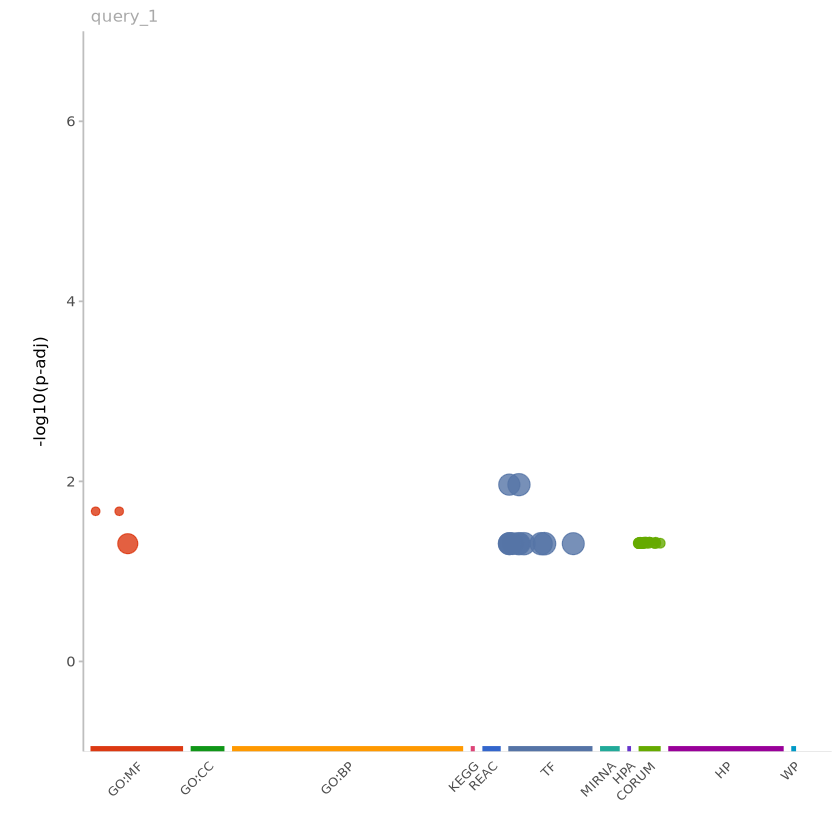

In [5]:
p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("DEGs_manhattan", p, 9, 5)

In [5]:
deg_sz = deg %>% filter(logFC > 0)
gostres <- gost(query=deg_sz$ensemblID, organism="hsapiens", 
                correction_method="fdr", significant=TRUE)
gostres$result %>% head(2)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,0.0344225,6,11,1,0.09090909,0.1666667,CORUM:15,CORUM,NCOR complex,3627,10,CORUM:0000000
2,query_1,TRUE,0.0344225,2,11,1,0.09090909,0.5000000,CORUM:5444,CORUM,CRKII-C3G complex,3627,1690,CORUM:0000000


In [ ]:
gostres$result %>% 
    data.table::fwrite(file = "upreg_DEGs_functional_enrichment.txt", sep="\t")

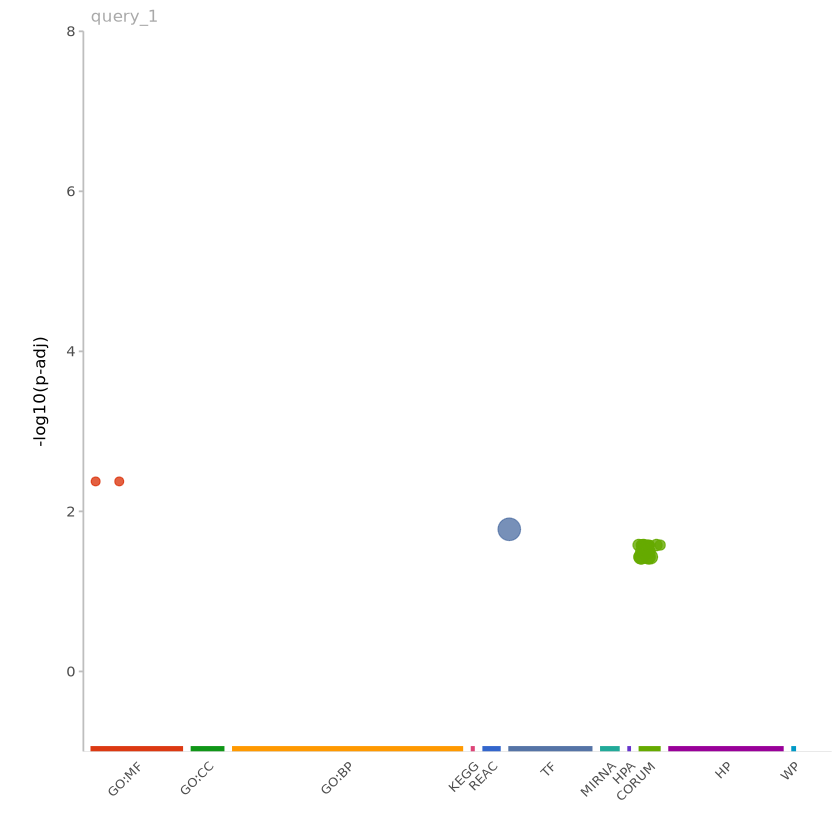

In [7]:
p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("upreg_DEGs_manhattan", p, 9, 5)

In [6]:
deg_ctl = deg %>% filter(logFC < 0)
gostres <- gost(query=deg_ctl$ensemblID, organism="hsapiens", 
                correction_method="fdr", significant=TRUE) 
gostres$result %>% head(2)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,0.009397956,7,12,2,0.16666667,0.2857143,CORUM:49,CORUM,DNMT3B complex,3627,21,CORUM:0000000
2,query_1,TRUE,0.019821006,2,12,1,0.08333333,0.5000000,CORUM:1458,CORUM,SNF2h-HDAC12 complex,3627,756,CORUM:0000000


In [ ]:
gostres$result %>% 
    data.table::fwrite(file = "downreg_DEGs_functional_enrichment.txt", sep="\t")

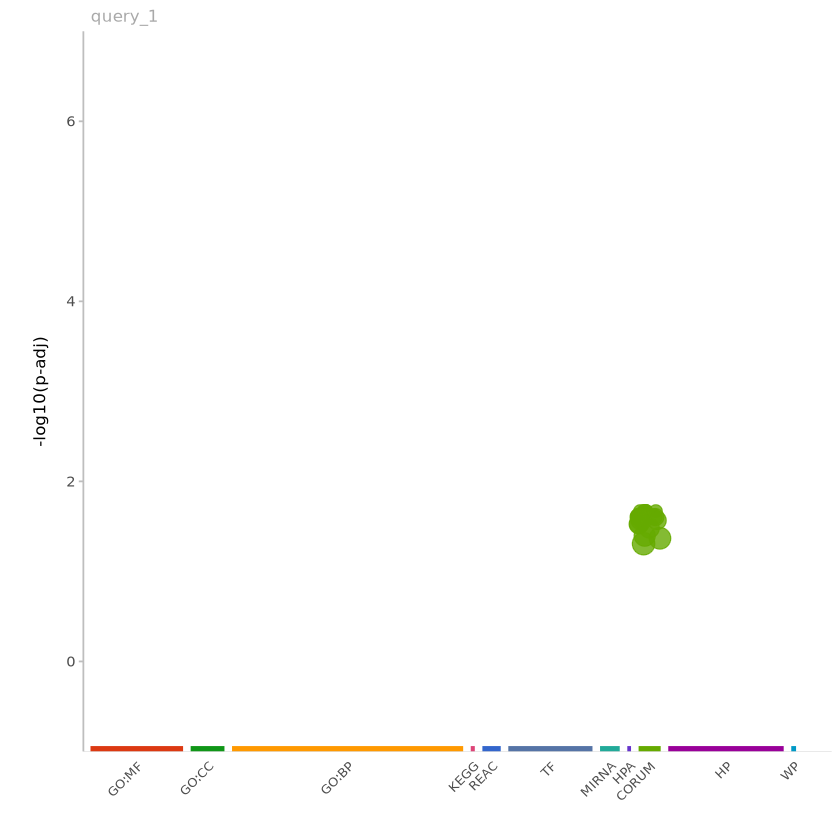

In [9]:
p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("downreg_DEGs_manhattan", p, 9, 5)

## Reproducibility Information

In [ ]:
Sys.time()
proc.time()
options(width = 120)
sessioninfo::session_info()